In [424]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [425]:
#read the dataset and check the first five rows
#check whether we have any header rows
loan_df = pd.read_csv("loan.csv")
loan_df.head()

C:\Users\V Jerry\AppData\Local\Temp\ipykernel_15692\1504282124.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [426]:
#check whether we have any footer rows
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [427]:
#Check the datatypes of all the columns of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [428]:
#check the shape of the dataset
loan_df.shape

(39717, 111)

In [429]:
#Check the percentage of null values in each column
null_percentage = (loan_df.isnull().sum() / len(loan_df)) * 100
print(null_percentage)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


In [430]:
#Drop all colmuns that has 100% null values 
loan = loan_df.dropna(axis=1, how='all')

In [431]:
#check the shape of the dataset
loan.shape

(39717, 57)

In [432]:
#Check no of unique values in a column
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [433]:
#Drop columns that has only one unique value as this doesn't impact our analysis
loan = loan.loc[:, loan.nunique() > 1]

In [434]:
#check the shape of the dataset
loan.shape

(39717, 48)

In [435]:
#Check count of values in each columns
loan.isnull().sum().sort_values()

id                             0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
addr_state                     0
zip_code                       0
dti                            0
purpose                        0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
funded_amnt                    0
home_ownership                 0
term                           0
annual_inc                     0
loan_amnt 

In [436]:
#Drop columns that has null values more than 25% of it's total rows
loan = loan.dropna(axis=1, thresh=(len(loan) * 0.75))

In [437]:
#check the shape of the dataset
loan.shape

(39717, 44)

In [438]:
#Check for Unique Values
loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [439]:
#Drop columns that has all values as unique as it will help us in our analysis
loan.drop(columns=['id','url','member_id'], inplace=True)
loan.shape

(39717, 41)

In [440]:
#Also drop columns that have description - texts that are not useful
loan.drop(columns=['title','emp_title'], inplace=True)
loan.shape

(39717, 39)

In [441]:
#Check the status of the loans
loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [442]:
#Currebt Loans can be excluded as it will not help us in determining the outcome of the loan
loan = loan[~(loan['loan_status'] == 'Current')]

In [443]:
#check the shape of the dataset
loan.shape

(38577, 39)

In [444]:
#after removing current ongoing loans, let us check whether there are any orrelevant columns 
loan.nunique().sort_values()

out_prncp_inv                  1
out_prncp                      1
term                           2
loan_status                    2
pub_rec_bankruptcies           3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     370
earliest_cr_line             524
zip_code                     822
loan_amnt                    870
funded_amnt                 1019
revol_util                  1088
total_rec_late_fee          1320
collection_recovery_fee     2616
dti                         2853
recoveries                  4040
annual_inc

In [445]:
#Again drop columns that has only one unique value as this doesn't impact our analysis
loan = loan.loc[:, loan.nunique() > 1]

In [446]:
#check the shape of the dataset
loan.shape

(38577, 37)

In [447]:
#Describe the dataset
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,...,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,...,22.052648,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.043479
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,...,11.425861,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.204583
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,...,13.000000,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.000000
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,...,20.000000,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,0.000000
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,...,29.000000,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,...,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [448]:
#Format the interest rate column - Remove the percentage at the end and convert to numeric
loan['int_rate'] = pd.to_numeric(loan['int_rate'].str.replace('%', ''))

In [449]:
#Describe the column after change
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [450]:
#Check the datatypes of all columns
loan.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp     

In [451]:
#Convert term to numeric and rename as term_in_months to be more readable
loan['term_in_months'] = pd.to_numeric(loan['term'].str.replace(' months', ''))

In [452]:
loan['term_in_months'].value_counts()

term_in_months
36    29096
60     9481
Name: count, dtype: int64

In [453]:
loan.drop('term', axis=1, inplace=True)

In [454]:
#check the shape of the dataset
loan.shape

(38577, 37)

In [455]:
#Convert all amount columns to float
loan[['loan_amnt', 'funded_amnt']] = loan[['loan_amnt', 'funded_amnt']].astype(float)

In [456]:
loan[['loan_amnt', 'funded_amnt']].dtypes

loan_amnt      float64
funded_amnt    float64
dtype: object

In [457]:
#Check data
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_in_months
0,5000.0,5000.0,4975.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,36
1,2500.0,2500.0,2500.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,60
2,2400.0,2400.0,2400.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,36
3,10000.0,10000.0,10000.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,36
5,5000.0,5000.0,5000.0,7.90,156.46,A,A4,3 years,RENT,36000.0,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,36


In [458]:
#Round all float columns to 2 decimal places
loan = loan.round(2)

In [459]:
#Check data
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_in_months
0,5000.0,5000.0,4975.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,36
1,2500.0,2500.0,2500.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,60
2,2400.0,2400.0,2400.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,36
3,10000.0,10000.0,10000.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,36
5,5000.0,5000.0,5000.0,7.90,156.46,A,A4,3 years,RENT,36000.0,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,36


In [460]:
#Format issue_d column, split into month and year
loan[['month_issued', 'year_issued']] = loan['issue_d'].str.split('-', expand=True)
#Format the year to hold 2011, 2010 etc
loan['year_issued'] = '20' + loan['year_issued']

In [461]:
#Check data
loan[['issue_d','year_issued','month_issued']].head()

,issue_d,year_issued,month_issued
0,Dec-11,2011,Dec
1,Dec-11,2011,Dec
2,Dec-11,2011,Dec
3,Dec-11,2011,Dec
5,Dec-11,2011,Dec


In [462]:
#check the shape of the dataset
loan.shape

(38577, 39)

In [463]:
#Drop issue_d
loan =loan.drop(columns=['issue_d'])

In [464]:
#check the shape of the dataset
loan.shape

(38577, 38)

In [465]:
#remove columns that belongs to repayemnt of the loan or after loan was disbursed
loan =loan.drop(columns=['total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','recoveries','collection_recovery_fee','last_pymnt_amnt','last_pymnt_d','last_credit_pull_d'])

In [466]:
#check the shape of the dataset
loan.shape

(38577, 28)

In [467]:
#drop column zip_code as it does not have correct value 
loan =loan.drop(columns=['zip_code'])

In [468]:
#check the shape of the dataset
loan.shape

(38577, 27)

In [469]:
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

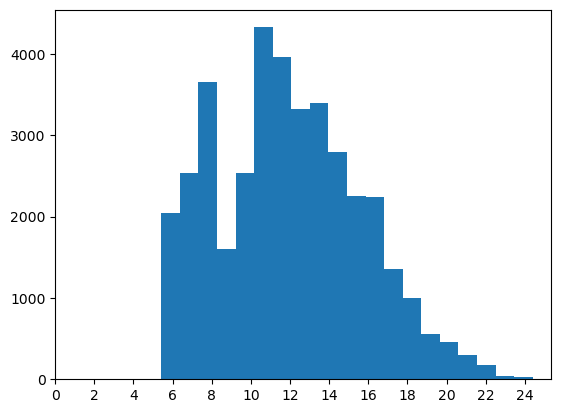

In [470]:
#Make a histogram to understand the distribution
plt.hist(loan['int_rate'], bins=20)
plt.xticks(range(0, 25, 2))
plt.show()

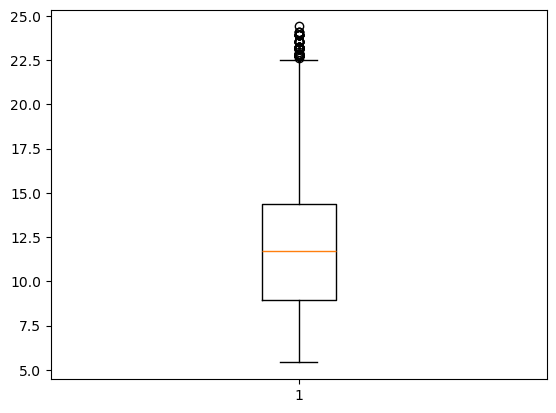

In [471]:
#Make a box plot to understand 
plt.boxplot(loan['int_rate'])
plt.show()

In [472]:
#Check count of values in each columns
loan.isnull().sum().sort_values()

loan_amnt                  0
term_in_months             0
total_acc                  0
revol_bal                  0
pub_rec                    0
open_acc                   0
inq_last_6mths             0
earliest_cr_line           0
delinq_2yrs                0
dti                        0
month_issued               0
purpose                    0
addr_state                 0
verification_status        0
annual_inc                 0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
funded_amnt_inv            0
funded_amnt                0
loan_status                0
year_issued                0
revol_util                50
pub_rec_bankruptcies     697
emp_length              1033
dtype: int64

In [473]:
# Percentage of null values in each columns
(loan.isnull().sum()*100)/len(loan)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
term_in_months          0.000000
month_issued            0.000000
year_issued             0.000000
dtype: float64

In [474]:
loan = loan[loan['emp_length'].notna()]
loan = loan[loan['pub_rec_bankruptcies'].notna()]

In [475]:
#check the shape of the dataset
loan.shape

(36847, 27)

In [476]:
# Percentage of null values in each columns
(loan.isnull().sum()*100)/len(loan)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.127554
total_acc               0.000000
pub_rec_bankruptcies    0.000000
term_in_months          0.000000
month_issued            0.000000
year_issued             0.000000
dtype: float64

In [477]:
#As revolv_util will have impact on lending decisions let us impute the null values with 0
loan['revol_util'] = loan['revol_util'].fillna(0)

In [478]:
#Describe revol_util
loan['revol_util'].describe()

count     36847
unique     1087
top          0%
freq        883
Name: revol_util, dtype: object

In [479]:
# Percentage of null values in each columns
(loan.isnull().sum()*100)/len(loan)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
term_in_months          0.0
month_issued            0.0
year_issued             0.0
dtype: float64

In [480]:
#check the shape of the dataset
loan.shape

(36847, 27)

In [481]:
#Let's split dataframe into 2 - Charged off and Fully Paid
loan_charged_off = loan[loan['loan_status'] == 'Charged Off']
loan_fully_paid = loan[loan['loan_status'] == 'Fully Paid']

In [482]:
#check the shape of the datasets
loan_charged_off.shape

(5281, 27)

In [483]:
#check the shape of the datasets
loan_fully_paid.shape

(31566, 27)

<Axes: xlabel='loan_status', ylabel='count'>

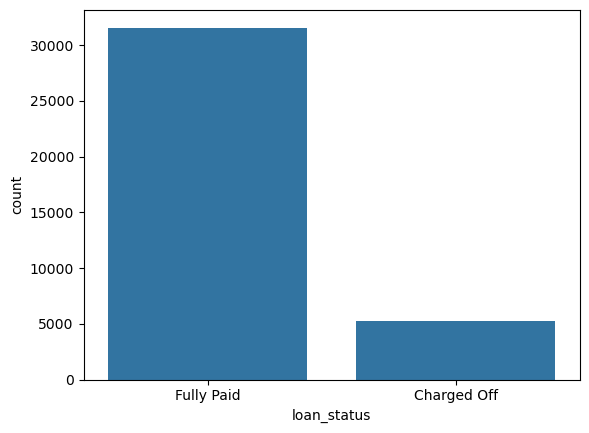

In [484]:
#Visualizing Categorical Data
sns.countplot(x = 'loan_status', data = loan)

<Axes: xlabel='grade', ylabel='count'>

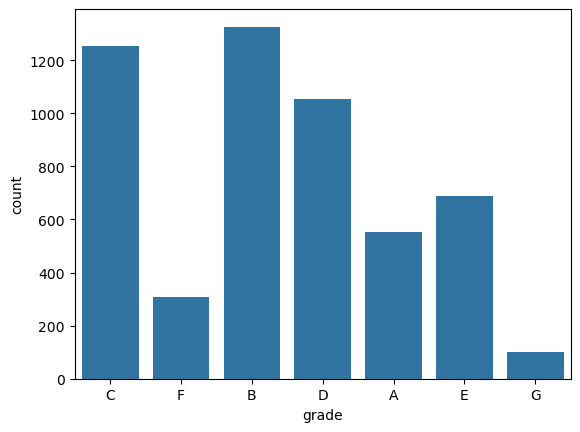

In [485]:
#Default Loans vs Grade
sns.countplot(x = 'grade', data = loan_charged_off)

<Axes: xlabel='home_ownership', ylabel='count'>

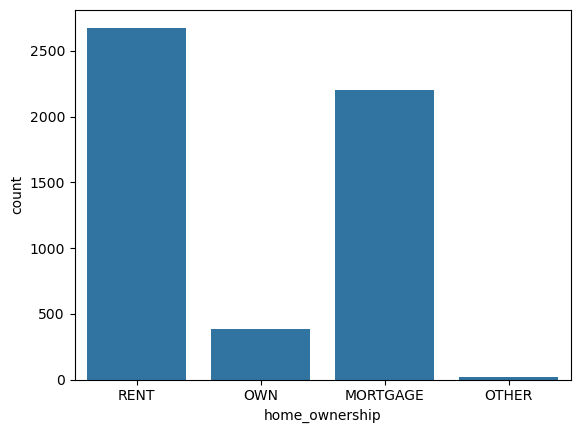

In [486]:
#Default Loans vs Home Ownership
sns.countplot(x='home_ownership', data = loan_charged_off)

<Axes: xlabel='purpose', ylabel='count'>

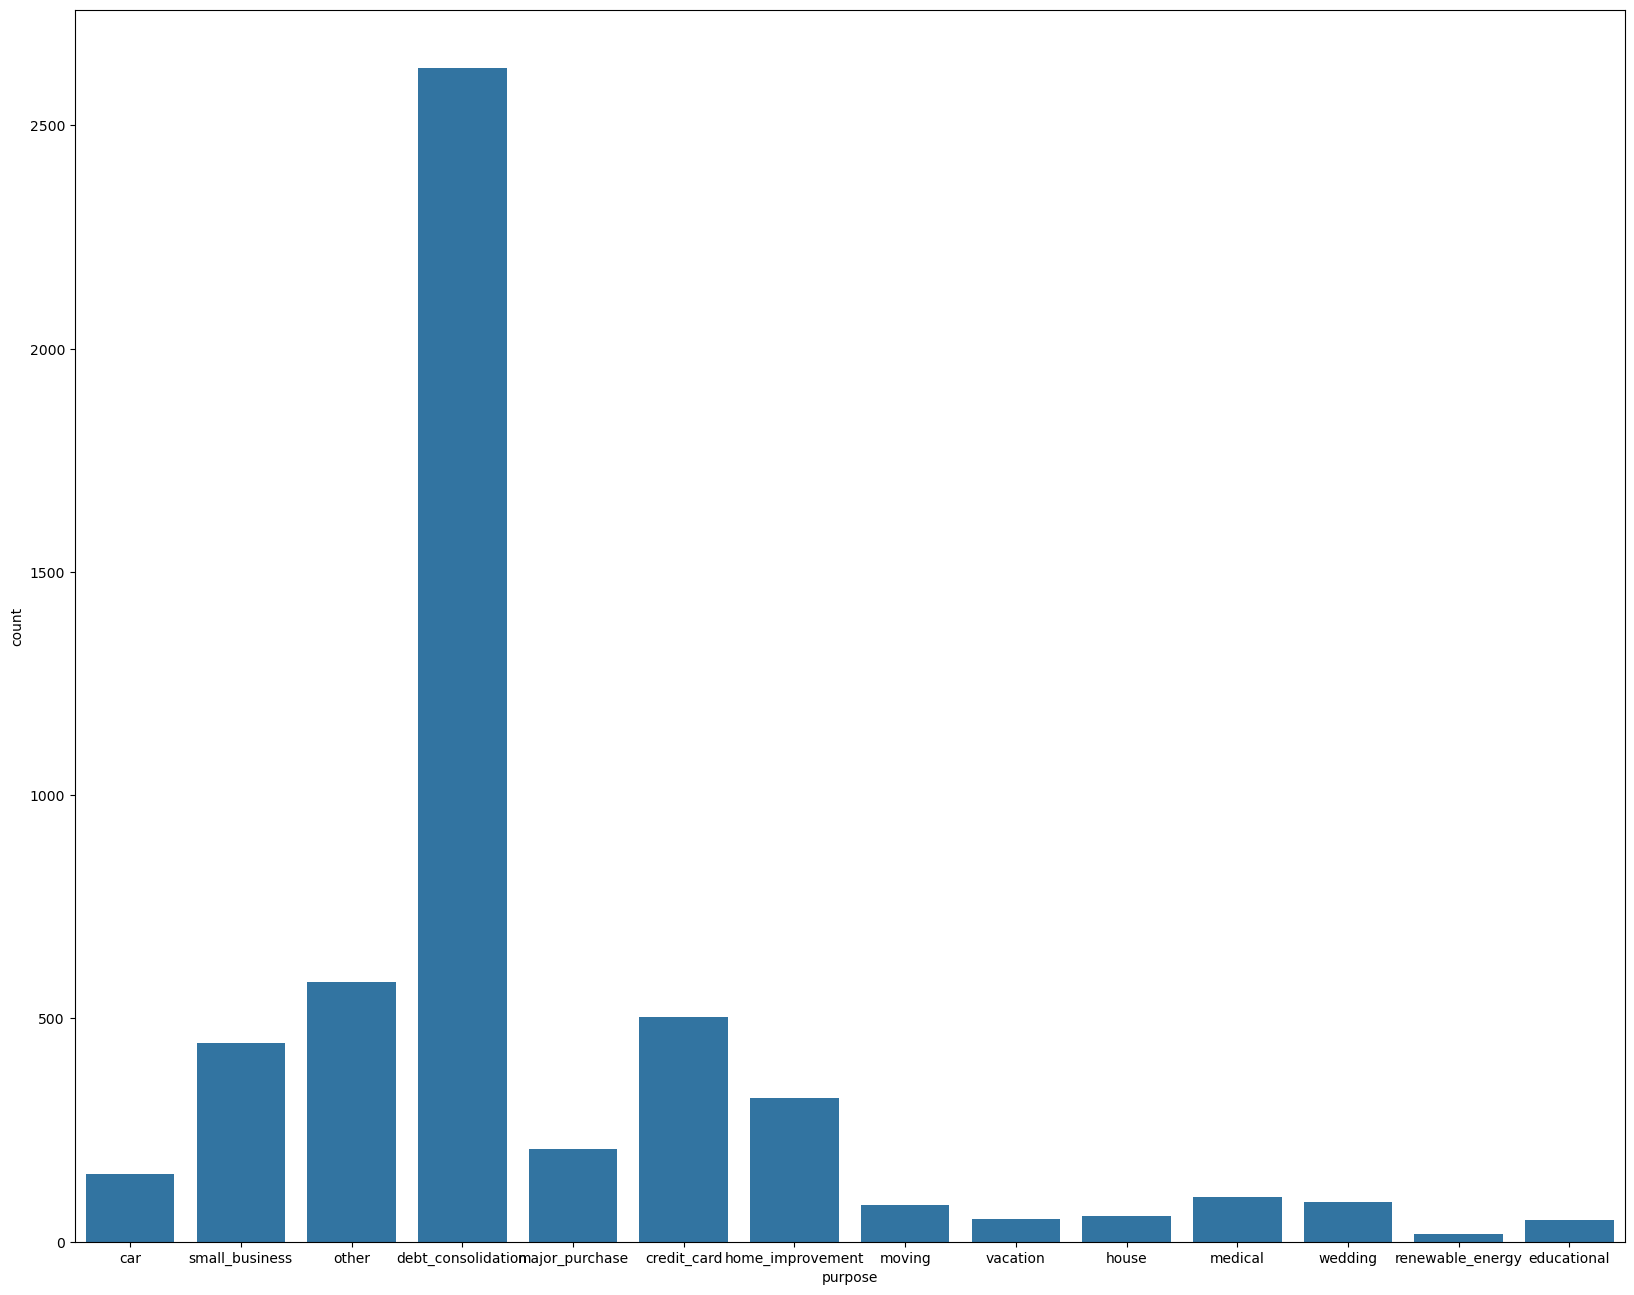

In [487]:
#Default loan vs Purpose of the loan
fig, ax = plt.subplots(figsize = (20,16))
sns.countplot(x ='purpose', data = loan_charged_off)

In [488]:
#Convert emp_length to numeric
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [555]:
loan['emp_length'] = loan['emp_length'].replace('< 1 year', '0 year')

In [557]:
loan['emp_length'].unique()

array(['10+ years', '0 year', '3 years', '8 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years'], dtype=object)

In [559]:
loan['emp_length'] = pd.to_numeric(loan['emp_length'].str.extract(r'(\d+)')[0])

In [561]:
loan['emp_length'].unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7], dtype=int64)

In [565]:
#Create segments of columns annual_inc, int_rate, emp_length
loan.int_rate.describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [567]:
# Define bins and labels
bins = [5, 10, 15, 25]
labels = ['Low', 'Medium', 'High']

# Create a new column with segments
loan['rate_segment'] = pd.cut(loan['int_rate'], bins=bins, labels=labels, include_lowest=True)

In [569]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term_in_months,month_issued,year_issued,rate_segment
0,5000.0,5000.0,4975.0,10.65,162.87,B,B2,10,RENT,24000.0,...,3,0,13648,83.70%,9,0.0,36,Dec,2011,Medium
1,2500.0,2500.0,2500.0,15.27,59.83,C,C4,0,RENT,30000.0,...,3,0,1687,9.40%,4,0.0,60,Dec,2011,High
2,2400.0,2400.0,2400.0,15.96,84.33,C,C5,10,RENT,12252.0,...,2,0,2956,98.50%,10,0.0,36,Dec,2011,High
3,10000.0,10000.0,10000.0,13.49,339.31,C,C1,10,RENT,49200.0,...,10,0,5598,21%,37,0.0,36,Dec,2011,Medium
5,5000.0,5000.0,5000.0,7.90,156.46,A,A4,3,RENT,36000.0,...,9,0,7963,28.30%,12,0.0,36,Dec,2011,Low


In [571]:
loan.emp_length.describe()

count    36847.000000
mean         4.961788
std          3.551783
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [573]:
# Define bins and labels
bins = [0, 3, 7, 10]
labels = ['Associate', 'Default', 'Senior']

# Create a new column with segments
loan['employee_job_level'] = pd.cut(loan['emp_length'], bins=bins, labels=labels, include_lowest=True)

In [575]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term_in_months,month_issued,year_issued,rate_segment,employee_job_level
0,5000.0,5000.0,4975.0,10.65,162.87,B,B2,10,RENT,24000.0,...,0,13648,83.70%,9,0.0,36,Dec,2011,Medium,Senior
1,2500.0,2500.0,2500.0,15.27,59.83,C,C4,0,RENT,30000.0,...,0,1687,9.40%,4,0.0,60,Dec,2011,High,Associate
2,2400.0,2400.0,2400.0,15.96,84.33,C,C5,10,RENT,12252.0,...,0,2956,98.50%,10,0.0,36,Dec,2011,High,Senior
3,10000.0,10000.0,10000.0,13.49,339.31,C,C1,10,RENT,49200.0,...,0,5598,21%,37,0.0,36,Dec,2011,Medium,Senior
5,5000.0,5000.0,5000.0,7.90,156.46,A,A4,3,RENT,36000.0,...,0,7963,28.30%,12,0.0,36,Dec,2011,Low,Associate


In [579]:
loan.annual_inc.max()

6000000.0

In [581]:
loan.annual_inc.min()

4000.0

In [585]:
# Define bins and labels
bins = [0, 100000.00, 500000.00,1000000.00,10000000.00]
labels = ['Low', 'Middle', 'Upper_Middle','Upper']

# Create a new column with segments
loan['income_segment'] = pd.cut(loan['annual_inc'], bins=bins, labels=labels, include_lowest=True)

In [587]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term_in_months,month_issued,year_issued,rate_segment,employee_job_level,income_segment
0,5000.0,5000.0,4975.0,10.65,162.87,B,B2,10,RENT,24000.0,...,13648,83.70%,9,0.0,36,Dec,2011,Medium,Senior,Low
1,2500.0,2500.0,2500.0,15.27,59.83,C,C4,0,RENT,30000.0,...,1687,9.40%,4,0.0,60,Dec,2011,High,Associate,Low
2,2400.0,2400.0,2400.0,15.96,84.33,C,C5,10,RENT,12252.0,...,2956,98.50%,10,0.0,36,Dec,2011,High,Senior,Low
3,10000.0,10000.0,10000.0,13.49,339.31,C,C1,10,RENT,49200.0,...,5598,21%,37,0.0,36,Dec,2011,Medium,Senior,Low
5,5000.0,5000.0,5000.0,7.90,156.46,A,A4,3,RENT,36000.0,...,7963,28.30%,12,0.0,36,Dec,2011,Low,Associate,Low


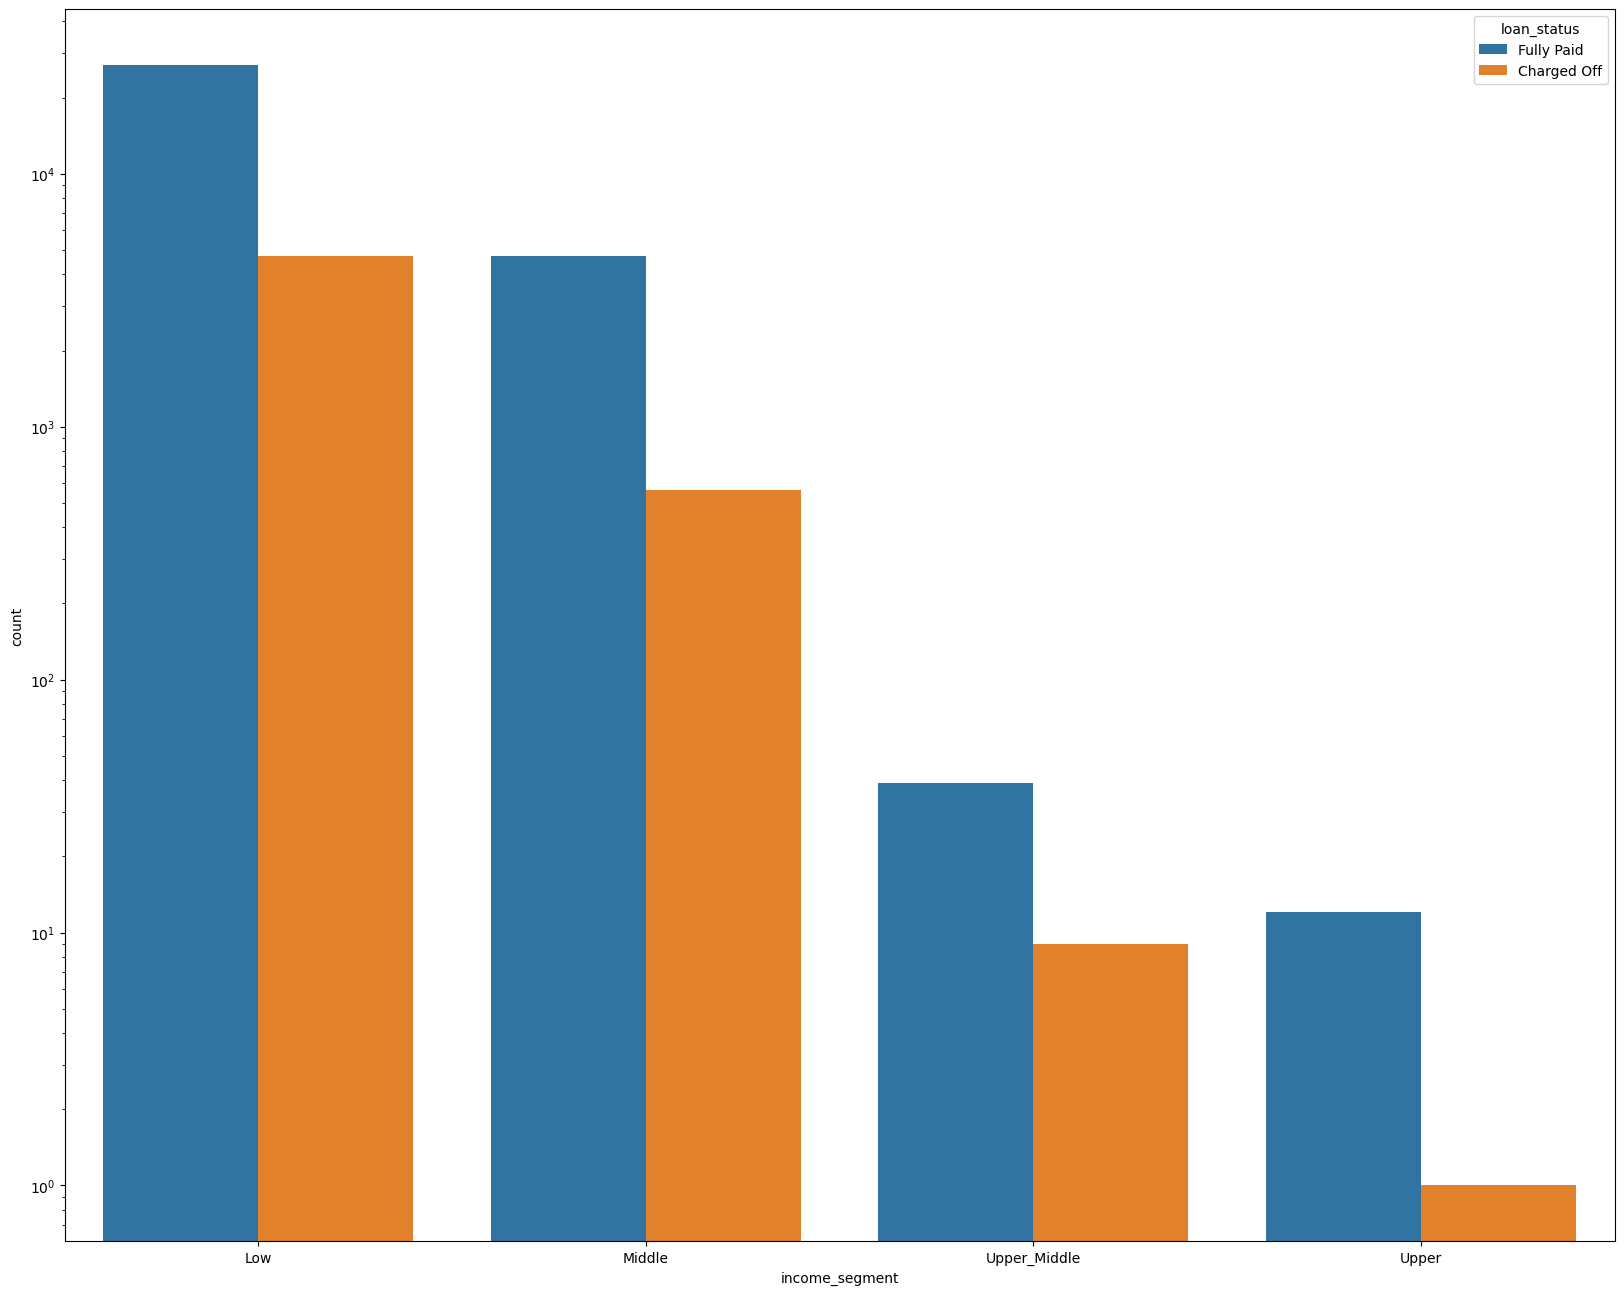

In [601]:
#Visualizing income_segment
fig, ax = plt.subplots(figsize = (20,16))
sns.countplot(x = 'income_segment', data = loan,hue ='loan_status')
plt.yscale('log')
plt.show()

<Axes: xlabel='year_issued', ylabel='count'>

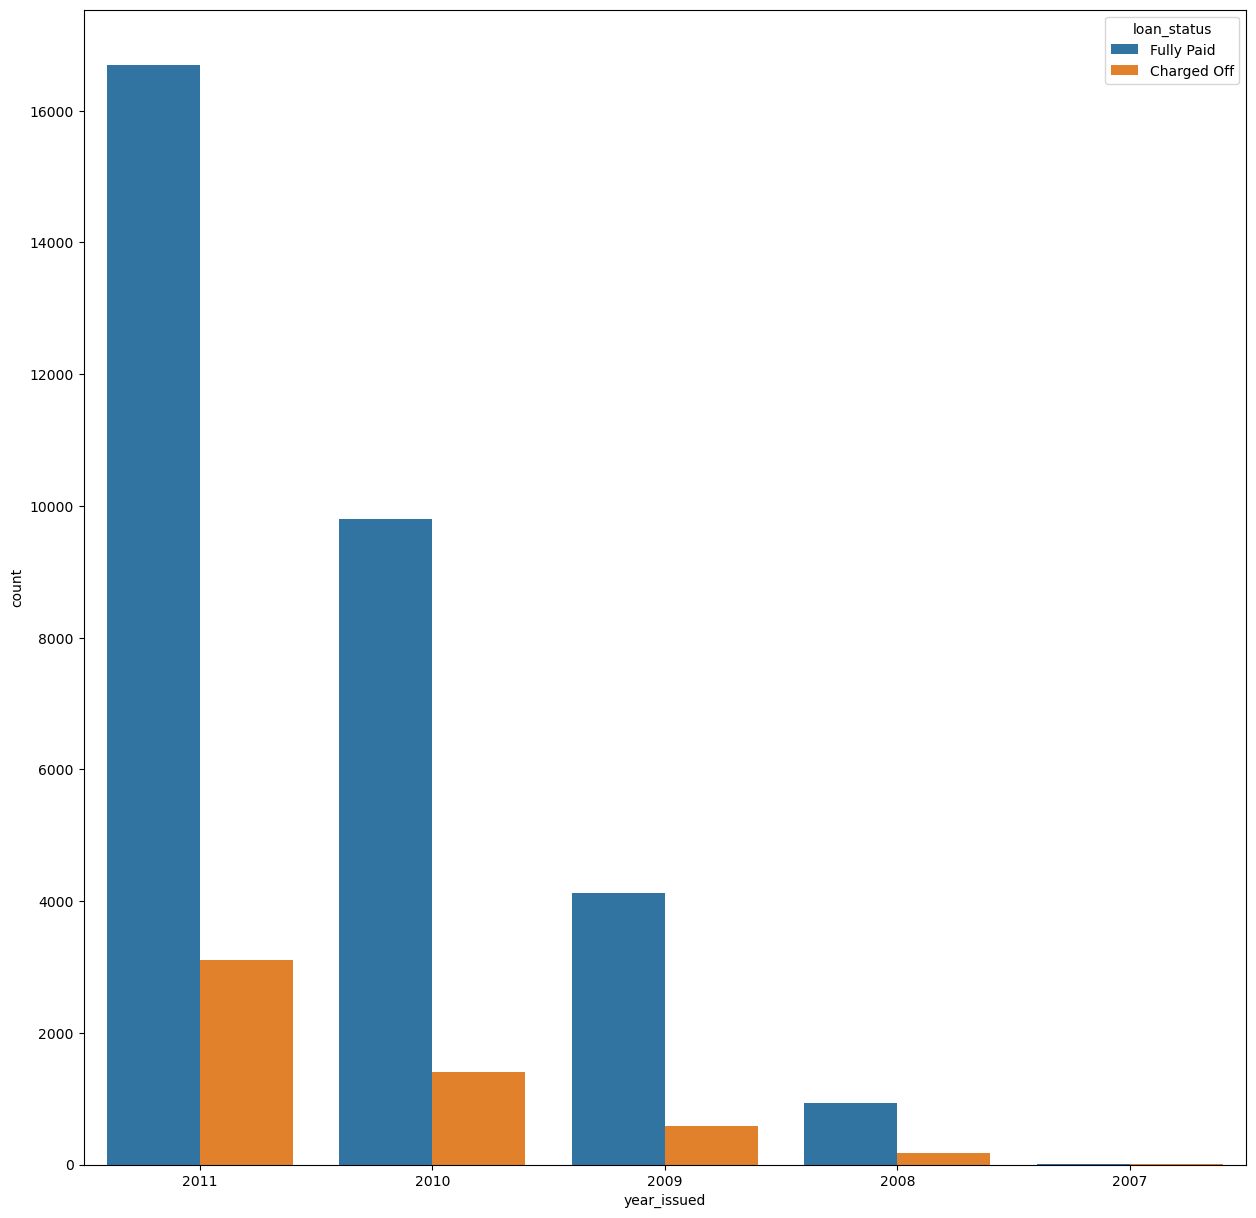

In [599]:
plt.figure(figsize=(15,15))
sns.countplot(x='year_issued',data=loan,hue ='loan_status')